In [1]:
include("load_save.jl")
dataset_name = String(split(split(@__FILE__, '\\')[end], '.')[1])
R, X, Y, L, F, Y, PY = load_big_dataset(dataset_name);

Dataset : GB1p_F


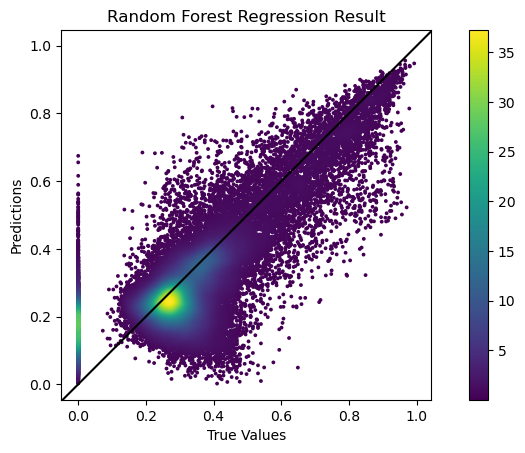

NRMSE : 0.125018


In [2]:
view_result(PY, Y, data_state);

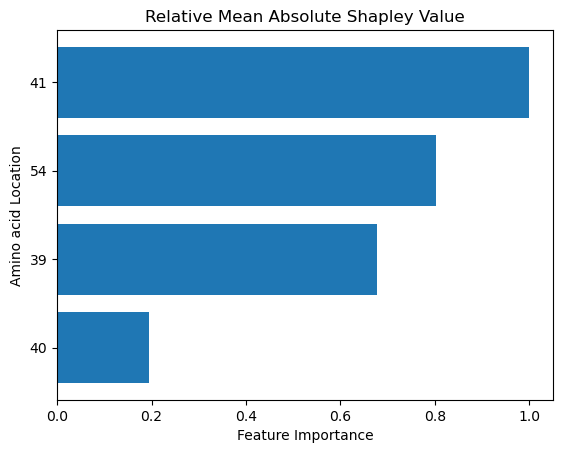

In [3]:
view_importance(R, L, F);

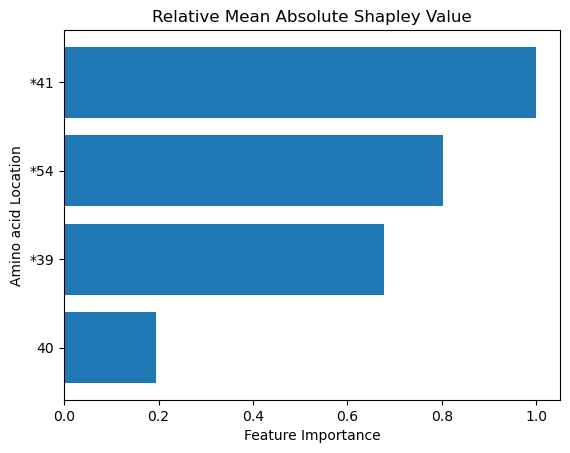

In [4]:
NL = Vector{String}()
for l in L
    if l ∈ [3, 5, 7, 9, 20, 26, 30, 34, 39, 41, 52, 54]
        push!(NL, "*" * string(l))
    else
        push!(NL, string(l))
    end
end
view_importance(R, NL, F, show_number=30);